# Demo-4: Liniendiagramm Vergleich zwischen Ländern/Kontinenten

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import matplotlib.dates as mdates

In [27]:
df = pd.read_csv("../dataset/cleaned_dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [28]:
ulkeler = df["Country"].unique()  # Benzersiz ülkeleri listele
ulke_secim = widgets.Dropdown(
    options=ulkeler,
    description="Wahl Land:",
    style={'description_width': 'initial'}
)

In [29]:
def guncelle(ulke):
    # Son 1 yılı filtrele
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')  # Hatalı formatları NaT yapar
    son_tarih = df["Date"].max()  # Maksimum tarihi al
    baslangic_tarih = son_tarih - pd.DateOffset(years=1)  # Son 1 yılın başlangıç tarihi

    df_ulke = df[(df["Country"] == ulke) & (df["Date"] >= baslangic_tarih)]
    
    # Toplam onaylanmış vaka sayısını hesapla
    toplam_vaka = df_ulke["Confirmed"].sum()
    
    # Metin olarak toplam vaka sayısını göster
    display(f"Gesamtzahl der bestätigten Fälle: {toplam_vaka:,}")

    # Grafiği oluştur
    plt.figure(figsize=(12, 6))
    plt.plot(df_ulke["Date"], df_ulke["Confirmed"], marker='o', linestyle='-', label=ulke, color='b')

    plt.xlabel("Datum")
    plt.ylabel("Bestätigte Fallzahl")
    plt.title(f"{ulke} - COVID-19 Bestätigte Fälle (in letztem Jahr)")
    
    # X eksenini her ay olacak şekilde ayarla
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Yıl-Ay formatı
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    
    plt.show()

In [30]:
widgets.interactive(guncelle, ulke=ulke_secim)

interactive(children=(Dropdown(description='Wahl Land:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorr…

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [32]:
df = pd.read_csv("../dataset/cleaned_dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [33]:
countries = df["Country"].unique()  # Listen einzigartige Ländern
ulke_secim = widgets.Dropdown(
    options=countries,
    description="Country:",
    style={'description_width': 'initial'}
)

# Wahl Datumsabstand
tarih_secim = widgets.SelectionRangeSlider(
    options=[str(date) for date in pd.to_datetime(df["Date"].unique())],
    index=(0, len(df["Date"].unique())-1),
    description="Datum Abstand:",
    style={'description_width': 'initial'}
)


In [34]:
def aktulisiere(country, tarih_araligi):
    # Seçilen tarih aralığını al
    baslangic_tarih, bitis_tarih = pd.to_datetime(tarih_araligi[0]), pd.to_datetime(tarih_araligi[1])
    
    # Seçilen ülkenin verilerini al
    df_country = df[(df["Country"] == country) & (df["Date"] >= baslangic_tarih) & (df["Date"] <= bitis_tarih)]
    
    # Toplam onaylanmış vaka sayısını hesapla
    toplam_vaka = df_country["Confirmed"].sum()  
    
    # Metin olarak toplam vaka sayısını göster
    display(f"Gesamtzahl der bestätigten Fälle: {toplam_vaka:,}")

    # Grafiği oluştur
    plt.figure(figsize=(12, 6))
    plt.plot(df_country["Date"], df_country["Confirmed"], marker='o', linestyle='-', label=country, color='b')

    plt.xlabel("Datum")
    plt.ylabel("Bestätigte Fallzahl")
    plt.title(f"{country} - COVID-19 Bestätigte Fallzahl ({baslangic_tarih.date()} - {bitis_tarih.date()})")
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    
    plt.show()

In [35]:
widgets.interactive(aktulisiere, country=ulke_secim, tarih_araligi=tarih_secim)

interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra'…

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [37]:
df = pd.read_csv("../dataset/cleaned_dataset.csv") 

In [38]:
# Kullanıcı için seçim menüleri
country_dropdown = widgets.Dropdown(
    options=df["Country"].unique(),
    description="Country:",
    continuous_update=False
)

date_dropdown = widgets.Dropdown(
    options=df["Date"].unique(),
    description="Date:",
    continuous_update=False
)
def update_plot(country, date):
    filtered_df = df[(df["Country"] == country) & (df["Date"] == date)]
    
    if filtered_df.empty:
        print("Bu tarihte veri bulunmamaktadır.")
        return
    
    plt.figure(figsize=(10, 5))
    plt.plot(df[df["Country"] == country]["Date"], df[df["Country"] == country]["Confirmed"], label="Confirmed", marker='o')
    plt.xlabel("Datum")
    plt.ylabel("Bestätigte Fallzahl")
    plt.title(f"{country} COVID-19-Falltrend")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    toplam_vaka = df_country["Confirmed"].sum()  
    
    # Metin olarak toplam vaka sayısını göster
    display(f"Gesamtzahl der bestätigten Fälle: {toplam_vaka:,}")
    plt.show()


interactive(children=(Dropdown(description='Country:', options=('Afghanistan', 'Albania', 'Algeria', 'Andorra'…

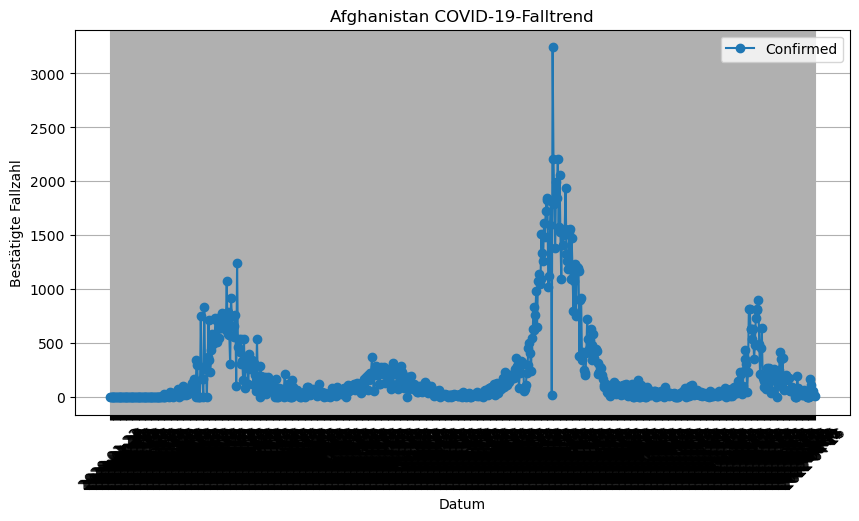

In [39]:
widgets.interactive(update_plot, country=country_dropdown, date=date_dropdown)

In [ ]:
countries = ["Germany", "France", "Italy"]  # Karşılaştırmak istediğin ülkeleri yaz
df_filtreli = df[df["Country"].isin(countries)]  # Seçili ülkeleri filtrele

In [ ]:
df_filtreli["Date"] = pd.to_datetime(df_filtreli["Date"])

In [ ]:
plt.figure(figsize=(12, 6))  

for country in countries:
    df_country = df_filtreli[df_filtreli["Country"] == country]
    plt.plot(df_country["Date"], df_country["Confirmed"], marker='o', label=country)

plt.xlabel("Datum")  
plt.ylabel("Bestätigte Fallzahl")  
plt.title("Vergleich der bestätigten COVID-19-Fälle nach Ländern")  
plt.xticks(rotation=45)  # Tarihleri eğimli göster
plt.legend()  
plt.grid(True, linestyle='--', alpha=0.5)  

plt.show()